# Ejercicio Python de K-means
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

Como ejemplo utilizaremos de entradas un conjunto de datos que [Juan Ignacio Bagnato](http://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/) obtuvo de un proyecto propio, en el que se analizaban rasgos de la personalidad de usuarios de Twitter. 

Filtró a 140 “famosos” del mundo en diferentes areas: deporte, cantantes, actores, etc. Basado en una metodología de psicología conocida como **“Ocean: The Big Five”** tendemos como características de entrada:

- `usuario`: (el nombre en Twitter)
- `op` = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
- `co` =Conscientiousness – grado de orden, prolijidad, organización
- `ex` = Extraversion – grado de timidez, solitario o participación ante el grupo social
- `ag` = Agreeableness – grado de empatía con los demás, temperamento
- `ne` = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
- `Wordcount` – Cantidad promedio de palabras usadas en sus tweets
- `Categoria` – Actividad laboral del usuario (actor, cantante, etc.)
    - `1` - Actor/actriz
    - `2` - Cantante
    - `3` - Modelo
    - `4` - Tv, series
    - `5` - Radio
    - `6` - Tecnología
    - `7` - Deportes
    - `8` - Politica
    - `9` - Escritor

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (20, 12)
plt.style.use('ggplot')

## Cargamos los datos de entrada del archivo csv

In [28]:
dataframe = pd.read_csv('../datasets/twitter.csv')
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [25]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [26]:
#vemos cuantos usuarios hay de cada categoria
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


## Visualizamos los datos

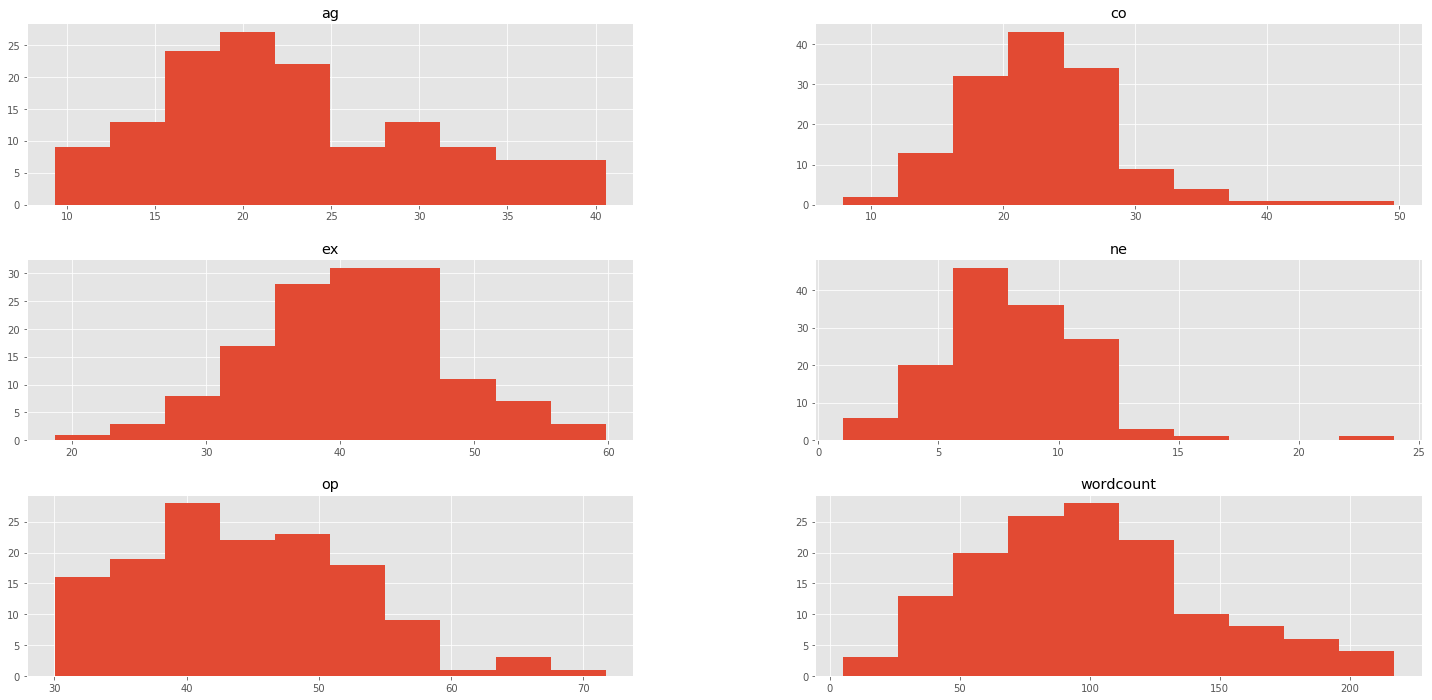

In [42]:
dataframe.drop(['categoria'],1).hist()
plt.show()

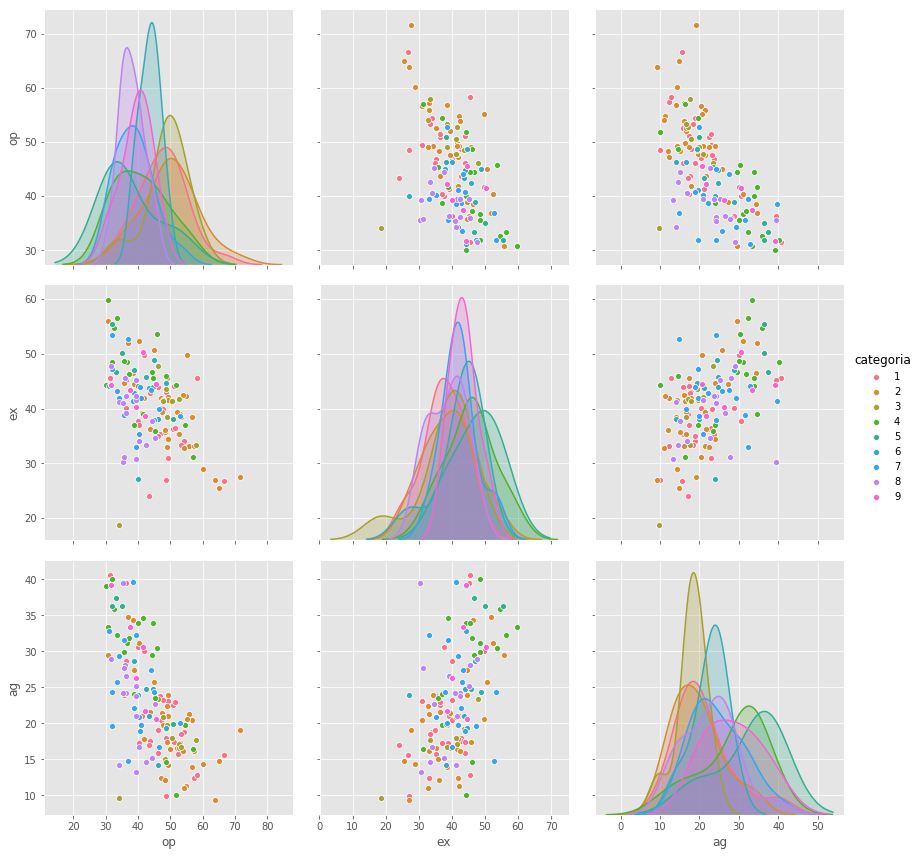

In [30]:
sb.pairplot(dataframe.dropna(), hue='categoria',height=4,vars=["op","ex","ag"],kind='scatter')

## Creamos el modelo

In [55]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder pintarlo
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

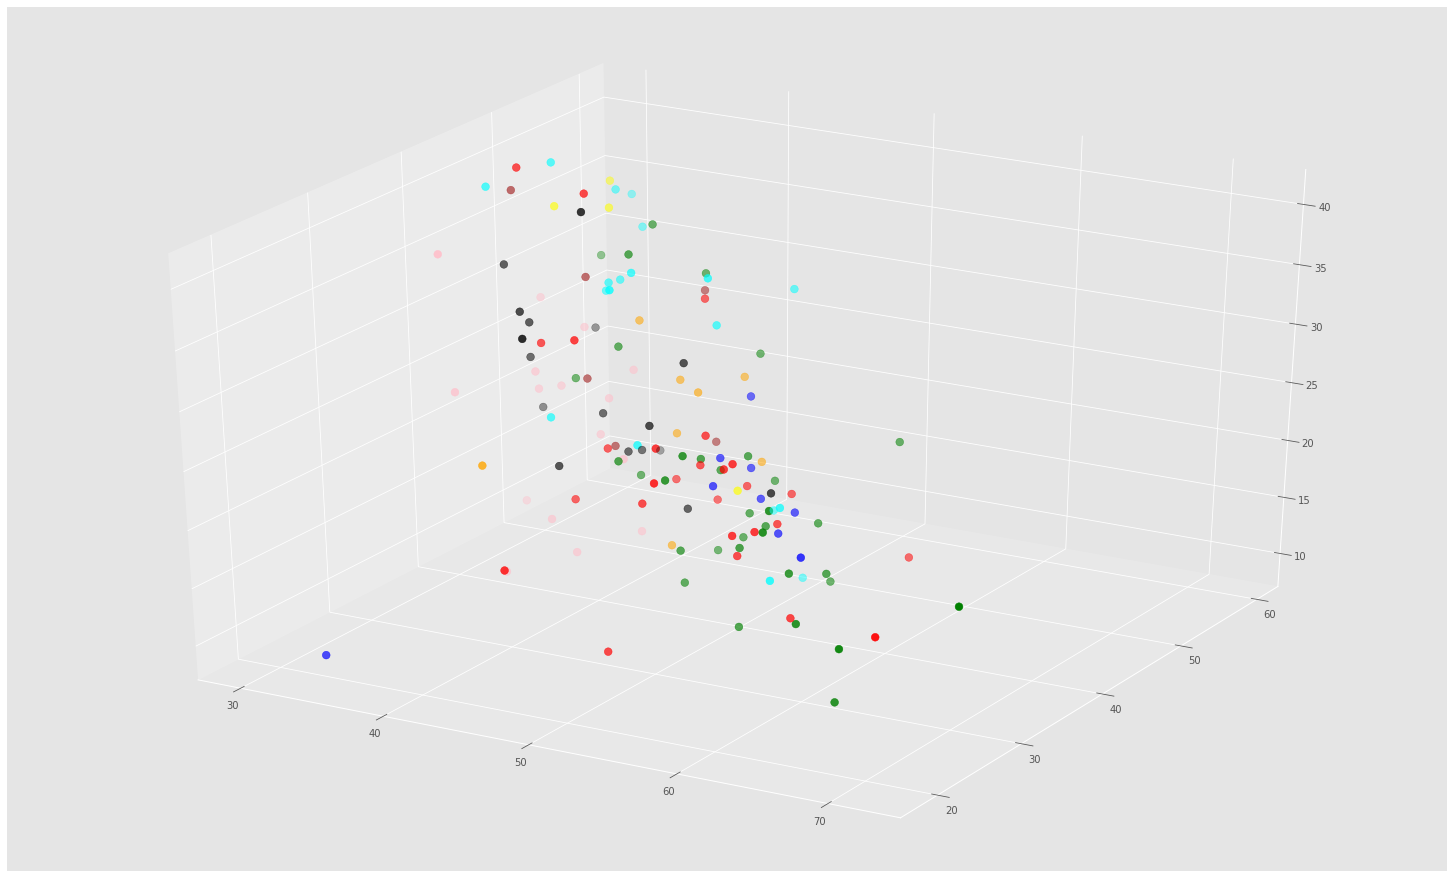

In [54]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']

#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

# Buscamos el valor K

In [38]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='

In [39]:
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

[-25194.039352766275,
 -12632.031536945236,
 -10006.303869646588,
 -8334.424802664325,
 -6975.701836041626,
 -6190.1121257297955,
 -5507.327282344042,
 -5006.104420789159,
 -4524.818981874951,
 -3947.580381985276,
 -3720.6147316872916,
 -3504.5592246874044,
 -3238.6380451189893,
 -2944.155657135355,
 -2829.5151612478835,
 -2655.793395127323,
 -2510.985028431396,
 -2387.864183751682,
 -2206.11711667976]

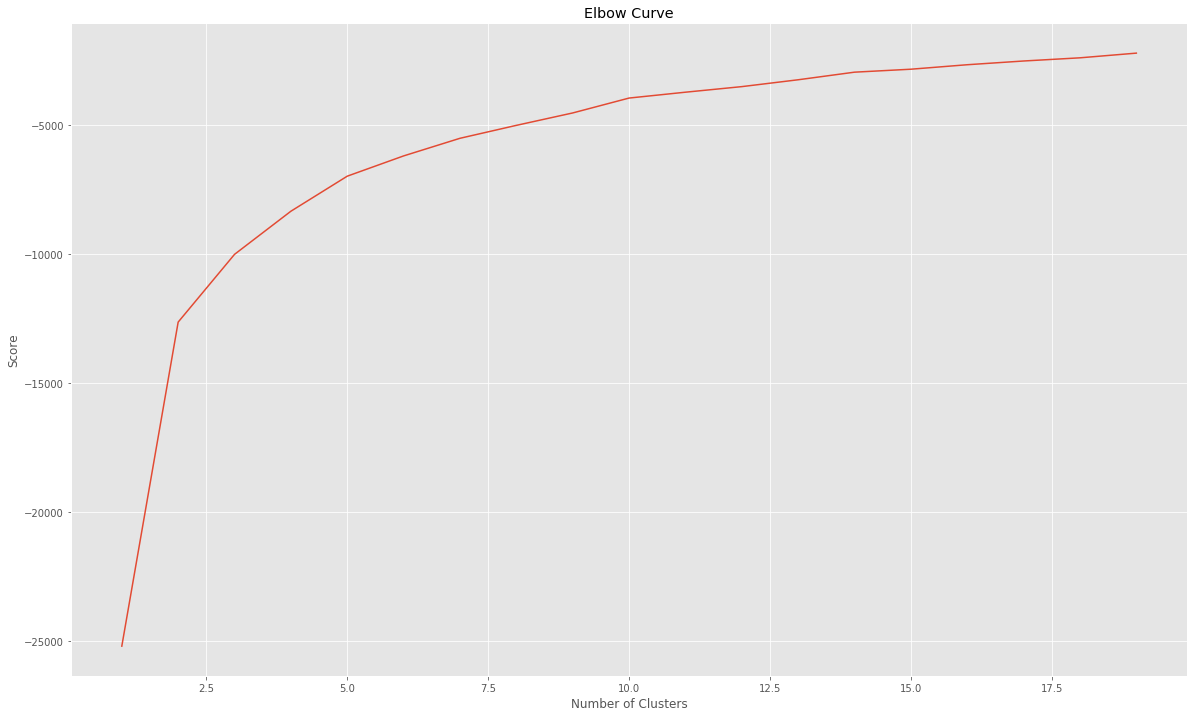

In [48]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [49]:
# Para el ejercicio, elijo 5 como un buen valor de K. Pero podría ser otro.
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[42.302263   33.65449587 20.812626  ]
 [39.86685966 45.20847056 25.30614166]
 [57.92200861 31.5039735  15.67199517]
 [34.82702519 47.11690063 34.66889141]
 [49.6606333  41.17669023 17.548775  ]]


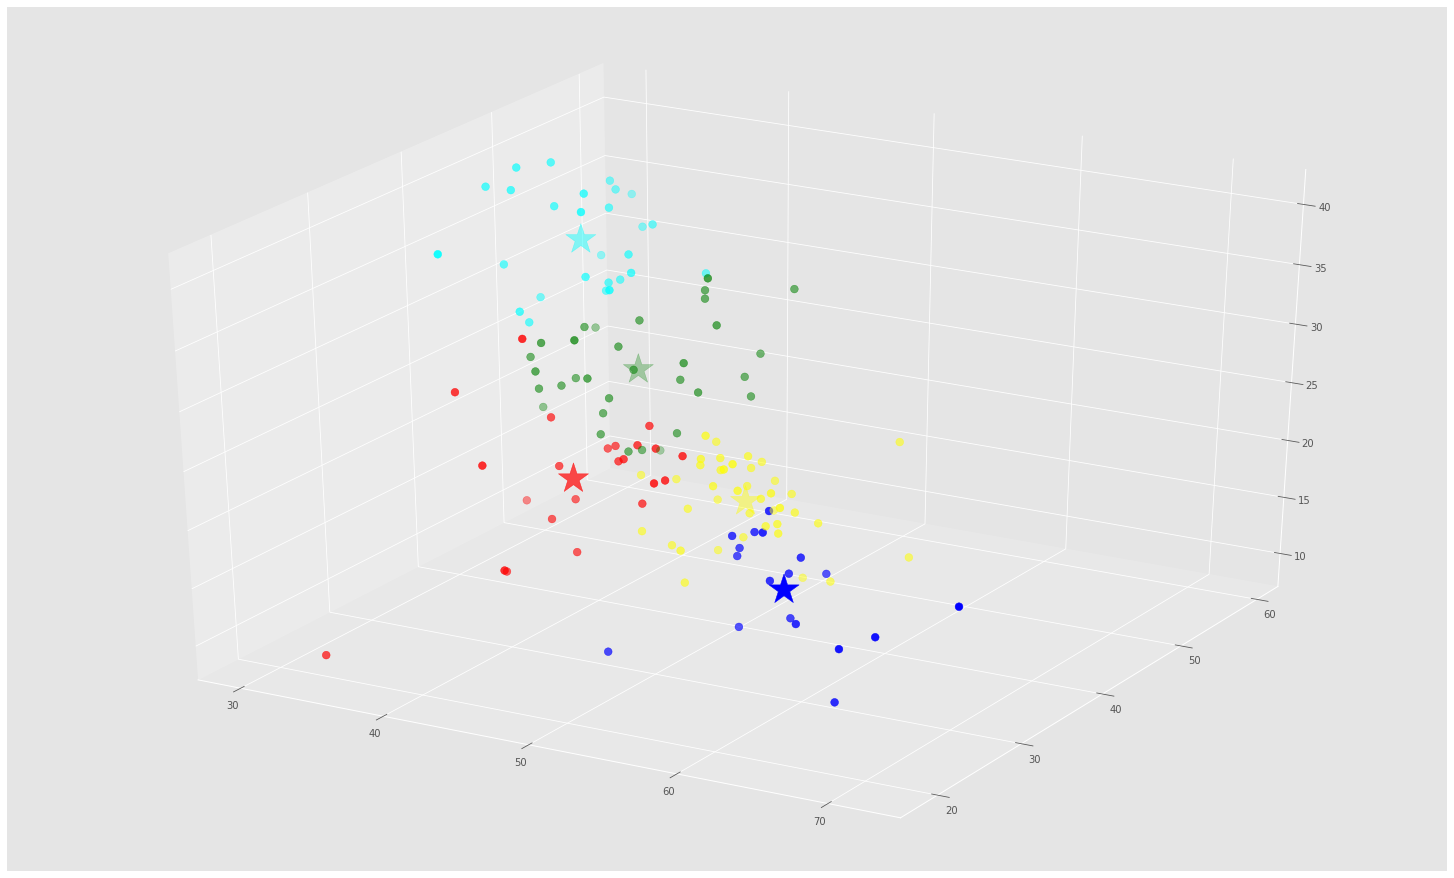

In [50]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

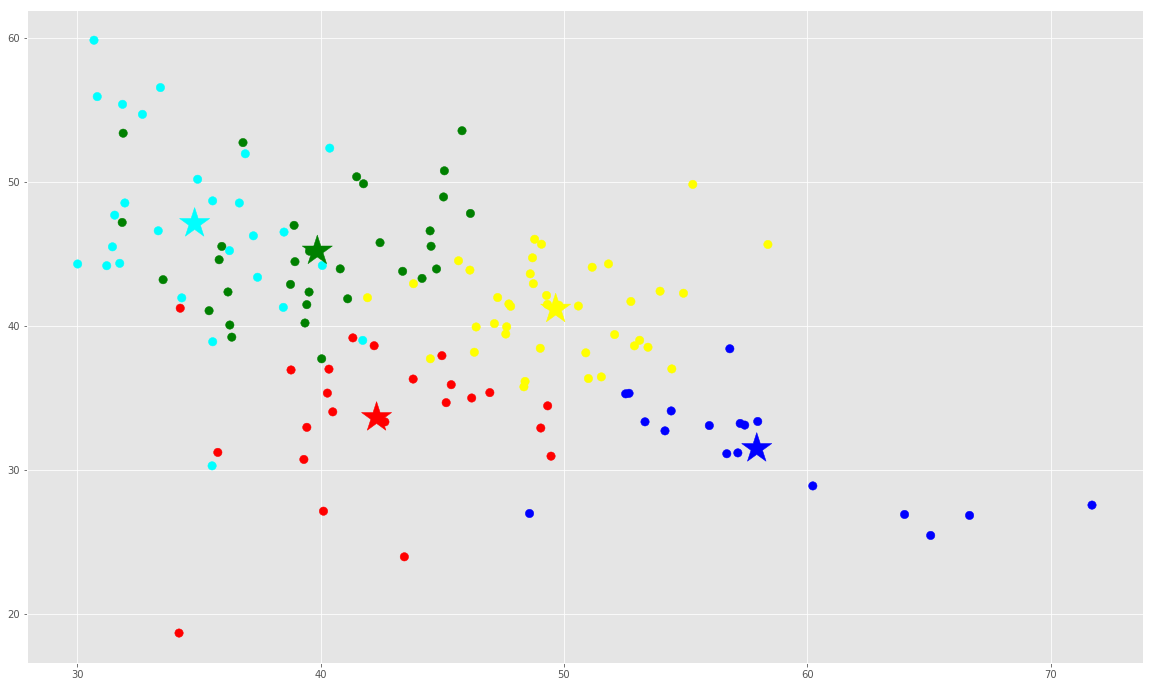

In [51]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

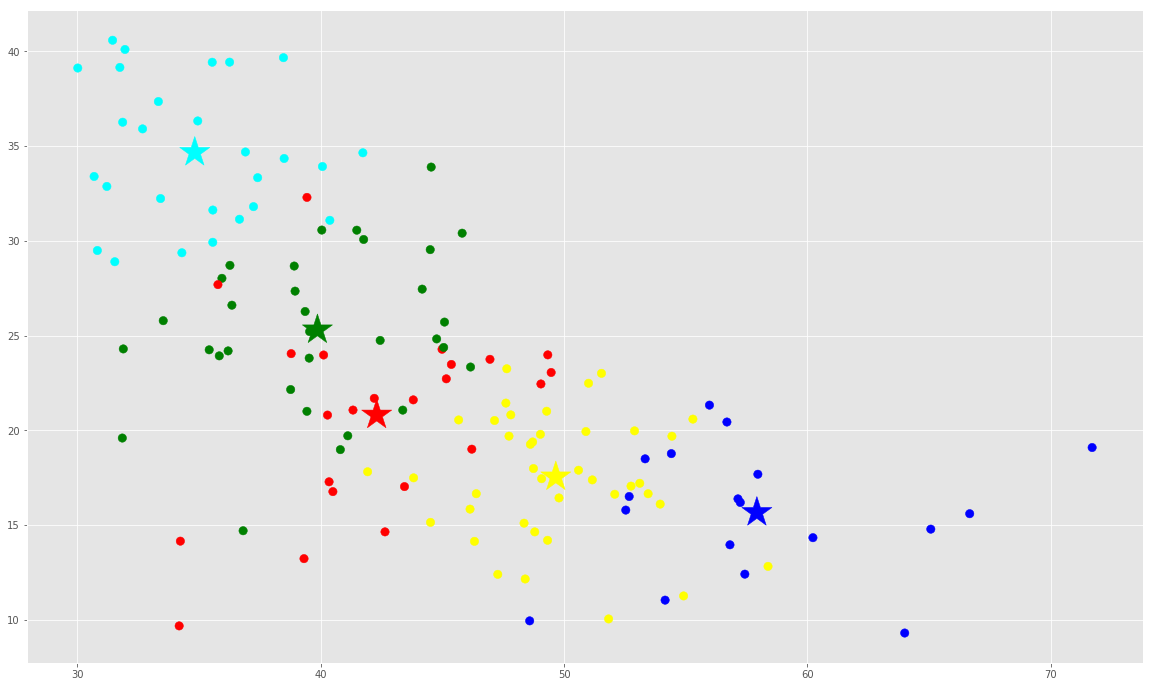

In [52]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

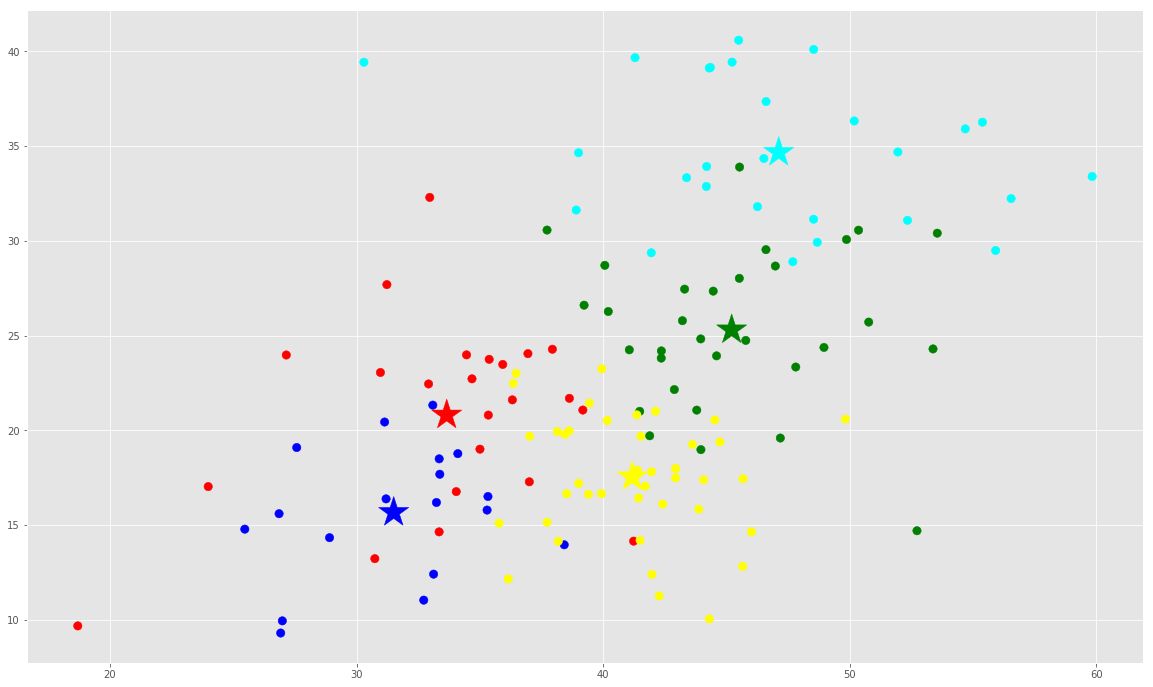

In [53]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

'''
# este codigo comentado agrega las categorias sobre cada punto
for label, x, y in zip(dataframe['categoria'].values, f1, f2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [16]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,30
1,green,41
2,blue,34
3,cyan,19
4,yellow,16


In [17]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 0
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,3.0
2,2,4.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,4.0
7,7,7.0
8,8,7.0
9,9,2.0


In [19]:
#imprimimos en pantalla los usuarios con categoria 2 del grupo
for index, row in group_referrals.iterrows():
    if row["categoria"] == 2:
        print (row["usuario"], row["categoria"],row["label"])

David_Busta 2 0
drexlerjorge 2 0
jtimberlake 2 0
pabloalboran 2 0


In [20]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 64,  21,  98, 120,  82])

In [21]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

ierrejon
carmenelectra
maria_patino
SarahPalinUSA
JudgeJudy


In [22]:
#miramos los usuarios del grupo 0
for index, row in copy.iterrows():
    if row["label"] == 0:
        print (row["usuario"], row["categoria"],row["label"])

alo_oficial 7 0
andresiniesta8 7 0
antoniobanderas 1 0
BarackObama 8 0
BillGates 6 0
charliesheen 1 0
ChristianG_7 4 0
Clyburn 8 0
David_Busta 2 0
DidacLee 6 0
drexlerjorge 2 0
edans 6 0
EdwardNorton 1 0
FernandezAnibal 8 0
hughlaurie 4 0
ierrejon 8 0
iescolar 9 0
JesusEncinar 6 0
jk_rowling 9 0
JohnKerry 8 0
jtimberlake 2 0
KAKA 7 0
KateUpton 3 0
lorenzo99 7 0
pabloalboran 2 0
Pablo_Iglesias_ 8 0
paugasol 7 0
RafaelNadal 7 0
sanchezcastejon 8 0
usainbolt 7 0


# Clasificación de nuevos registros

In [23]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

#NOTA: en el array podemos poner más de un array para evaluar a varios usuarios nuevos a la vez

[1]


NOTA FINAL: Los resultados obtenidos pueden varias de ejecución en ejecución pues al inicializar aleatoriamente los centroids, podemos obtener grupos distintos o los mismos pero en distinto orden y color